In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.datasets import load_boston

raw_data = load_boston()
print(raw_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
df["PRICE"] = raw_data.target
display(df)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

# Binning & Smooting

Data içinde bulunan "DIS" değişkeninde Evin Bostondaki iş merkezlerine uzaklığı ağırlıklı olarak hesaplanmış. Bu değişkeni farklı yöntemler kullanarak Ayrıklaştırmak istiyoruz.  

[]

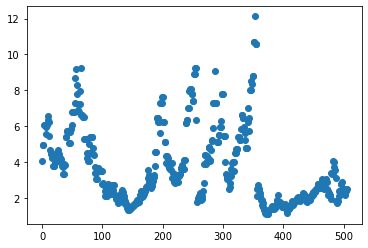

In [4]:
# Bu scatterplotı Ayrıklaştırma işlemi yapıldıktan sonraki hali ile karşılaştırabilirsiniz
DIS = df.DIS
x = np.arange(len(DIS))
plt.scatter(x, DIS)
plt.plot()

### Soru

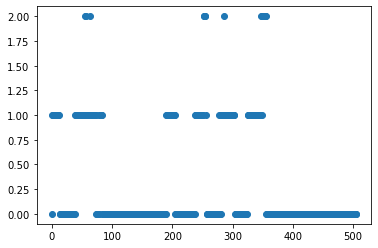

In [9]:
#new_DIS, bins = # y değişkeninin için pd.cut fonksiyonunu kullanarak df.DIS 'ın ayrıklaştırılmış hali ile doldurun 
                # NOT: bins parametresi için "3", labels için "[0,1,2]" ve retbins için "True" değerlerini kullanın
new_DIS, bins =pd.cut(DIS, bins=3, retbins=True, labels=[0,1,2])
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)

<b>pd.cut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
-- Equal-frequency(Eşit frekans)<br>
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [11]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print(" Equal-width (eşit aralıklar)")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [ 1.1186031   4.79523333  8.46086667 12.1265    ]

 Ayrık değerlerin görülme sayısı
0    365
1    125
2     16
Name: DIS, dtype: int64 


 Equal-width (eşit aralıklar)


### Soru 

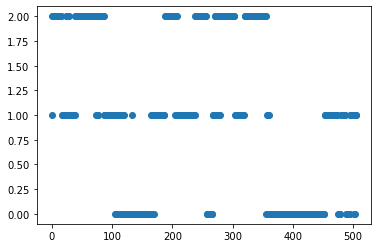

In [12]:
#new_DIS, bins = # aynı işlemi pd.qcut kullanarak yapın
                # NOT: q parametresi için "3", labels için "[0,1,2]" ve retbins için "True" değerlerini kullanın
new_DIS, bins =pd.qcut(DIS, q=3, retbins=True, labels=[0,1,2])
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)

<b>pd.qcut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
-- Equal-frequency(Eşit frekans)<br>
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [14]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("Equal-frequency(Eşit frekans)")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [ 1.1296      2.38403333  4.3257     12.1265    ]

 Ayrık değerlerin görülme sayısı
2    169
0    169
1    168
Name: DIS, dtype: int64 


Equal-frequency(Eşit frekans)


# Feature Generation

Bu bölümde var olan değişkenlerden yeni değişkenler üretelim.

In [ ]:
# seçtiğiniz iki değişkenin toplamından yeni bir değişken üretin

In [ ]:
#birbirlerine olan correlation'ları yüksek olduğundan bu iki değişkeni seçtim.

In [8]:
df["RAD+TAX"]=df.RAD+df.TAX
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  PTRATIO+LSTAT  
0       15.3  396.90   4.98   24.0          20.28  
1       17.8  396.90   9.14   21.6          26.94  
2       17.8  392.83   4.03   34.7          21.83  
3       18.7  394.63   2.94   33.4          21.64  
4       18.7  396.90   5.33   36.2          24.03  
..       ...     ...    ...    ...            ...  
501     21.0  391.99   9.67   22.4          30.67  
502     21.0  396.90   9.08   20.6          30.08  
503     21.0  396.90   5.64   23.9          26.64  
504     21.0  393.45   6.48   22.0          27.48  
505     21.0  396.90   7.88   11.9          28.88  

[506 rows x 15 columns]

In [ ]:
# seçtiğiniz iki değişkenin farkından yeni bir değişken üretin

In [9]:
df["RAD-TAX"]=df.RAD-df.TAX
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  PTRATIO+LSTAT  PTRATIO-LSTAT  
0       15.3  396.90   4.98   24.0          20.28          10.32  
1       17.8  396.90   9.14   21.6          26.94           8.66  
2       17.8  392.83   4.03   34.7          21.83          13.77  
3       18.7  394.63   2.94   33.4          21.64          15.76  
4       18.7  396.90   5.33   36.2          24.03          13.37  
..       ...     ...    ...    ...            ...            ...  
501     21.0  391.99   9.67   22.4          30.67          11.33  
502     21.0  396.90   9.08   20.6          30.08          11.92  
503     21.0  396.90   5.64   23.9          26.64          15.36  
504     21.0  393.45   6.48   22.0          27.48          14.52  
505     21.0  396.90   7.88   11.9          28.88          13.12  

[506 rows x 16 columns]

In [ ]:
# seçtiğiniz iki değişkenin bölümünden yeni bir değişken üretin

In [10]:
df["RAD/TAX"]=df.RAD/df.TAX
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  PTRATIO+LSTAT  PTRATIO-LSTAT  \
0       15.3  396.90   4.98   24.0          20.28          10.32   
1       17.8  396.90   9.14   21.6          26.94           8.66   
2       17.8  392.83   4.03   34.7          21.83          13.77   
3       18.7  394.63   2.94   33.4          21.64          15.76   
4       18.7  396.90   5.33   36.2          24.03          13.37   
..       ...     ...    ...    ...            ...            ...   
501     21.0  391.99   9.67   22.4          30.67          11.33   
502     21.0  396.90   9.08   20.6          30.08          11.92   
503     21.0  396.90   5.64   23.9          26.64          15.36   
504     21.0  393.45   6.48   22.0          27.48          14.52   
505     21.0  396.90   7.88   11.9          28.88          13.12   

     PTRATIO/LSTAT  
0         3.072289  
1         1.947484  
2         4.416873  
3         6.360544  
4         3.508443  
..             ...  
501       2.171665  
502       2.312775  
503       3.723404  
504       3.240741  
505       2.664975  

[506 rows x 17 columns]

In [ ]:
# seçtiğiniz iki değişkenin çarpımından yeni bir değişken üretin

In [11]:
df["RAD*TAX"]=df.RAD*df.TAX
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  PTRATIO+LSTAT  PTRATIO-LSTAT  \
0       15.3  396.90   4.98   24.0          20.28          10.32   
1       17.8  396.90   9.14   21.6          26.94           8.66   
2       17.8  392.83   4.03   34.7          21.83          13.77   
3       18.7  394.63   2.94   33.4          21.64          15.76   
4       18.7  396.90   5.33   36.2          24.03          13.37   
..       ...     ...    ...    ...            ...            ...   
501     21.0  391.99   9.67   22.4          30.67          11.33   
502     21.0  396.90   9.08   20.6          30.08          11.92   
503     21.0  396.90   5.64   23.9          26.64          15.36   
504     21.0  393.45   6.48   22.0          27.48          14.52   
505     21.0  396.90   7.88   11.9          28.88          13.12   

     PTRATIO/LSTAT  PTRATIO*LSTAT  
0         3.072289         76.194  
1         1.947484        162.692  
2         4.416873         71.734  
3         6.360544         54.978  
4         3.508443         99.671  
..             ...            ...  
501       2.171665        203.070  
502       2.312775        190.680  
503       3.723404        118.440  
504       3.240741        136.080  
505       2.664975        165.480  

[506 rows x 18 columns]

sklearn kütüphanesindeki PolynomialFeatures'ı kullanarak yeni featurelar üretin (NOT:Hedef değişkeni(PRICE) yeni featureları üretirken kullanmayın.)

In [ ]:
# PolynomialFeatures kullandığınız python kodunu buraya yazabilirsiniz.

In [43]:
df_drop=df

In [44]:
df_drop.drop('PRICE',axis=1, inplace=True)

In [45]:
df_drop

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [46]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1, interaction_only=False)
pd.DataFrame(poly.fit_transform(df_drop))

0        1     2      3    4      5      6     7       8    9     10  \
0    1.0  0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    1.0  0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    1.0  0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    1.0  0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    1.0  0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..   ...      ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   
501  1.0  0.06263   0.0  11.93  0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  1.0  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  1.0  0.06076   0.0  11.93  0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  1.0  0.10959   0.0  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  1.0  0.04741   0.0  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

       11      12    13  
0    15.3  396.90  4.98  
1    17.8  396.90  9.14  
2    17.8  392.83  4.03  
3    18.7  394.63  2.94  
4    18.7  396.90  5.33  
..    ...     ...   ...  
501  21.0  391.99  9.67  
502  21.0  396.90  9.08  
503  21.0  396.90  5.64  
504  21.0  393.45  6.48  
505  21.0  396.90  7.88  

[506 rows x 14 columns]

# Normalizasyon

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

sklearn kütüphanesindeki Min-max scalerı kullanarak datayı normalize edip yeni bir dataframe içine atayın 

In [53]:
mms = MinMaxScaler(feature_range=(-1,1))
mms_data = mms.fit_transform(df)
pd.DataFrame(mms_data)

0     1         2    3         4         5         6         7  \
0   -1.000000 -0.64 -0.864370 -1.0 -0.370370  0.155011  0.283213 -0.461594   
1   -0.999528 -1.00 -0.515396 -1.0 -0.654321  0.095995  0.565396 -0.302076   
2   -0.999529 -1.00 -0.515396 -1.0 -0.654321  0.388772  0.198764 -0.302076   
3   -0.999414 -1.00 -0.873900 -1.0 -0.699588  0.317111 -0.116375 -0.102911   
4   -0.998590 -1.00 -0.873900 -1.0 -0.699588  0.374210  0.056643 -0.102911   
..        ...   ...       ...  ...       ...       ...       ...       ...   
501 -0.998734 -1.00 -0.159091 -1.0 -0.226337  0.161908  0.363543 -0.754658   
502 -0.999124 -1.00 -0.159091 -1.0 -0.226337 -0.019352  0.520082 -0.789413   
503 -0.998776 -1.00 -0.159091 -1.0 -0.226337  0.308680  0.814624 -0.811238   
504 -0.997679 -1.00 -0.159091 -1.0 -0.226337  0.238935  0.779609 -0.770972   
505 -0.999076 -1.00 -0.159091 -1.0 -0.226337 -0.053842  0.604531 -0.749857   

            8         9        10        11        12  
0   -1.000000 -0.583969 -0.425532  1.000000 -0.820640  
1   -0.913043 -0.790076  0.106383  1.000000 -0.591060  
2   -0.913043 -0.790076  0.106383  0.979475 -0.873068  
3   -0.826087 -0.866412  0.297872  0.988552 -0.933223  
4   -0.826087 -0.866412  0.297872  1.000000 -0.801325  
..        ...       ...       ...       ...       ...  
501 -1.000000 -0.671756  0.787234  0.975238 -0.561810  
502 -1.000000 -0.671756  0.787234  1.000000 -0.594371  
503 -1.000000 -0.671756  0.787234  1.000000 -0.784216  
504 -1.000000 -0.671756  0.787234  0.982601 -0.737859  
505 -1.000000 -0.671756  0.787234  1.000000 -0.660596  

[506 rows x 13 columns]

sklearn kütüphanesindeki StandardScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [54]:
std = StandardScaler()
std_data = std.fit_transform(df)
pd.DataFrame(std_data)

0         1         2         3         4         5         6  \
0   -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1   -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2   -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3   -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4   -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.413229 -0.487722  0.115738 -0.272599  0.158124  0.439316  0.018673   
502 -0.415249 -0.487722  0.115738 -0.272599  0.158124 -0.234548  0.288933   
503 -0.413447 -0.487722  0.115738 -0.272599  0.158124  0.984960  0.797449   
504 -0.407764 -0.487722  0.115738 -0.272599  0.158124  0.725672  0.736996   
505 -0.415000 -0.487722  0.115738 -0.272599  0.158124 -0.362767  0.434732   

            7         8         9        10        11        12  
0    0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
1    0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
2    0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
3    1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  
4    1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  
..        ...       ...       ...       ...       ...       ...  
501 -0.625796 -0.982843 -0.803212  1.176466  0.387217 -0.418147  
502 -0.716639 -0.982843 -0.803212  1.176466  0.441052 -0.500850  
503 -0.773684 -0.982843 -0.803212  1.176466  0.441052 -0.983048  
504 -0.668437 -0.982843 -0.803212  1.176466  0.403225 -0.865302  
505 -0.613246 -0.982843 -0.803212  1.176466  0.441052 -0.669058  

[506 rows x 13 columns]

sklearn kütüphanesindeki RobustScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [56]:
rbs = RobustScaler()
rbs_data = rbs.fit_transform(df)
pd.DataFrame(rbs_data)

0     1         2    3         4         5         6         7  \
0   -0.069593  1.44 -0.571650  0.0  0.000000  0.496612 -0.250765  0.285777   
1   -0.063755  0.00 -0.202943  0.0 -0.394286  0.287940  0.028542  0.569789   
2   -0.063760  0.00 -0.202943  0.0 -0.394286  1.323171 -0.334353  0.569789   
3   -0.062347  0.00 -0.581720  0.0 -0.457143  1.069783 -0.646279  0.924391   
4   -0.052144  0.00 -0.581720  0.0 -0.457143  1.271680 -0.475025  0.924391   
..        ...   ...       ...  ...       ...       ...       ...       ...   
501 -0.053930  0.00  0.173509  0.0  0.200000  0.521003 -0.171254 -0.236007   
502 -0.058759  0.00  0.173509  0.0  0.200000 -0.119919 -0.016310 -0.297887   
503 -0.054450  0.00  0.173509  0.0  0.200000  1.039973  0.275229 -0.336744   
504 -0.040867  0.00  0.173509  0.0  0.200000  0.793360  0.240571 -0.265053   
505 -0.058164  0.00  0.173509  0.0  0.200000 -0.241870  0.067278 -0.227459   

        8         9        10        11        12  
0   -0.20 -0.087855 -1.339286  0.261902 -0.637681  
1   -0.15 -0.227390 -0.446429  0.261902 -0.221889  
2   -0.15 -0.227390 -0.446429  0.066675 -0.732634  
3   -0.10 -0.279070 -0.125000  0.153016 -0.841579  
4   -0.10 -0.279070 -0.125000  0.261902 -0.602699  
..    ...       ...       ...       ...       ...  
501 -0.20 -0.147287  0.696429  0.026382 -0.168916  
502 -0.20 -0.147287  0.696429  0.261902 -0.227886  
503 -0.20 -0.147287  0.696429  0.261902 -0.571714  
504 -0.20 -0.147287  0.696429  0.096414 -0.487756  
505 -0.20 -0.147287  0.696429  0.261902 -0.347826  

[506 rows x 13 columns]

# Correlation & Covariance

Bu hücrede değişkenlerin birbiri ile olan korelasyonları heatmap kullanarak görselleştirildi.<br>
Aşağıdaki sorular bu görseli incelemeye ve yorumlamaya yönelik olacaktır.


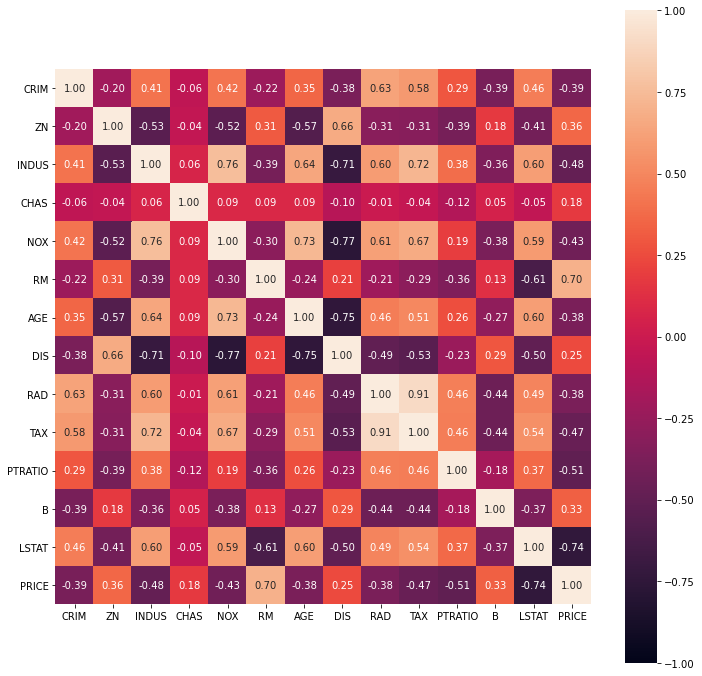

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, square=True, annot=True, fmt='.2f')
plt.show()

Aşağıda örnek iki değişken için scatter plot çizilmiştir.

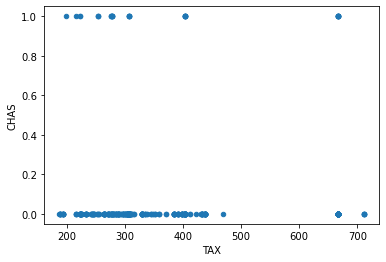

In [7]:
df.plot.scatter("TAX","CHAS")
plt.show()
# scatter plot çizerken buradan kopya çekebilirsiniz :)

Yukarıdaki heatmapten birbiri ile pozitif yüksek korelasyona sahip iki değişken için scatter plot çiziniz. Bir iki cümle ile görseli yorumlamaya çalışınız. Not:Yorum yaparken değişkenlerin yukarıdaki açıklamalarından faydalanabilirsiniz.

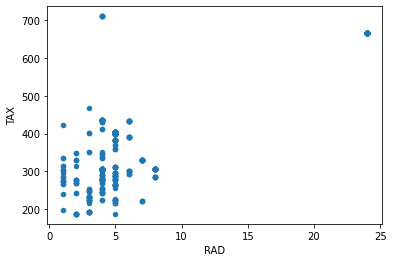

Yorumunuzu bu print içine yazabilirsiniz


In [8]:
df.plot.scatter("RAD","TAX")
plt.show()

print("Yorum yapamadım")

Heatmapten faydalanarak negatif korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız

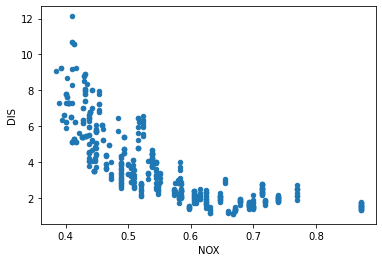

Yorumunuzu bu print içine yazabilirsiniz


In [9]:
df.plot.scatter("NOX","DIS")
plt.show()

print("Yorum yapamadım")

Heatmapten faydalanarak düşük korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız.

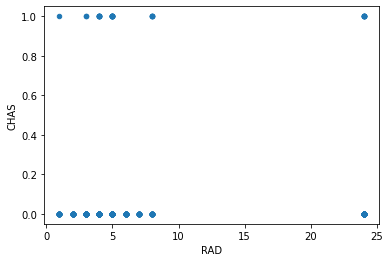

Yorumunuzu bu print içine yazabilirsiniz


In [10]:
df.plot.scatter("RAD","CHAS")
plt.show()

print("Yorum yapamadım")

### Soru

<b>Adım 1 :</b>df.cov() methodunu kullanarak datasetteki covariance değerlerini hesaplayın.<br> 
sns.heatmap ile bu methodu görselleştirin (IPUCU: Yukarıda korelasyon gösteriminde kullanılan yöntemin aynısı)
heatmap için vmin ve vmax parametrelerini kullanmayın.

In [11]:
display(df.cov())

CRIM           ZN       INDUS      CHAS        NOX         RM  \
CRIM      73.986578   -40.215956   23.992339 -0.122109   0.419594  -1.325038   
ZN       -40.215956   543.936814  -85.412648 -0.252925  -1.396148   5.112513   
INDUS     23.992339   -85.412648   47.064442  0.109669   0.607074  -1.887957   
CHAS      -0.122109    -0.252925    0.109669  0.064513   0.002684   0.016285   
NOX        0.419594    -1.396148    0.607074  0.002684   0.013428  -0.024603   
RM        -1.325038     5.112513   -1.887957  0.016285  -0.024603   0.493671   
AGE       85.405322  -373.901548  124.513903  0.618571   2.385927  -4.751929   
DIS       -6.876722    32.629304  -10.228097 -0.053043  -0.187696   0.303663   
RAD       46.847761   -63.348695   35.549971 -0.016296   0.616929  -1.283815   
TAX      844.821538 -1236.453735  833.360290 -1.523367  13.046286 -34.583448   
PTRATIO    5.399331   -19.776571    5.692104 -0.066819   0.047397  -0.540763   
B       -302.381816   373.721402 -223.579756  1.131325  -4.020570   8.215006   
LSTAT     27.986168   -68.783037   29.580270 -0.097816   0.488946  -3.079741   
PRICE    -30.718508    77.315176  -30.520823  0.409409  -0.455412   4.493446   

                 AGE         DIS          RAD           TAX     PTRATIO  \
CRIM       85.405322   -6.876722    46.847761    844.821538    5.399331   
ZN       -373.901548   32.629304   -63.348695  -1236.453735  -19.776571   
INDUS     124.513903  -10.228097    35.549971    833.360290    5.692104   
CHAS        0.618571   -0.053043    -0.016296     -1.523367   -0.066819   
NOX         2.385927   -0.187696     0.616929     13.046286    0.047397   
RM         -4.751929    0.303663    -1.283815    -34.583448   -0.540763   
AGE       792.358399  -44.329379   111.770846   2402.690122   15.936921   
DIS       -44.329379    4.434015    -9.068252   -189.664592   -1.059775   
RAD       111.770846   -9.068252    75.816366   1335.756577    8.760716   
TAX      2402.690122 -189.664592  1335.756577  28404.759488  168.153141   
PTRATIO    15.936921   -1.059775     8.760716    168.153141    4.686989   
B        -702.940328   56.040356  -353.276219  -6797.911215  -35.059527   
LSTAT     121.077725   -7.473329    30.385442    654.714520    5.782729   
PRICE     -97.589017    4.840229   -30.561228   -726.255716  -10.110657   

                   B       LSTAT       PRICE  
CRIM     -302.381816   27.986168  -30.718508  
ZN        373.721402  -68.783037   77.315176  
INDUS    -223.579756   29.580270  -30.520823  
CHAS        1.131325   -0.097816    0.409409  
NOX        -4.020570    0.488946   -0.455412  
RM          8.215006   -3.079741    4.493446  
AGE      -702.940328  121.077725  -97.589017  
DIS        56.040356   -7.473329    4.840229  
RAD      -353.276219   30.385442  -30.561228  
TAX     -6797.911215  654.714520 -726.255716  
PTRATIO   -35.059527    5.782729  -10.110657  
B        8334.752263 -238.667516  279.989834  
LSTAT    -238.667516   50.994760  -48.447538  
PRICE     279.989834  -48.447538   84.586724

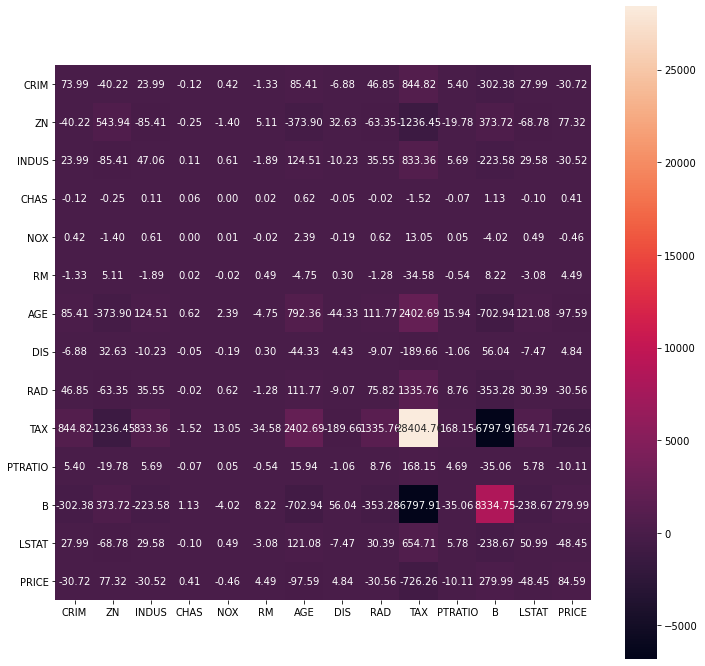

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(df.cov(),square=True, annot=True, fmt='.2f')
plt.show()

In [ ]:
# Heatmap için python kodunu bu hücreye yazın

# Bilgi: Kovaryans değerinden anlam çıkartmak korelasyona göre daha zor çıkan grafikten bunu farkedebilirsiniz.

<b>Adım 2 :</b> Şimdi sklearn.preprocessing paketi içindeki StandardScaler objesini kullanarak datayı standardize edin ve bunu ayrı bir dataframede tutun. Standardize edilmiş dataframe objesinin Kovaryans değerini tekrar hesaplatıp görselleştirin.

<br>IPUCU : standardScalerdan gelen dönüştürülmüş datayı tekrar pandas DataFrame objesine çevirin ve bunu yaparken kolon adlarını kaybetmemeye çalışın örn: pd.DataFrame(standardize_numpy_datası, columns=df.columns)

In [15]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler() 

In [21]:
std_data = std.fit_transform(df)
std_data=pd.DataFrame(std_data, columns=df.columns)
std_data

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1   -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2   -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3   -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4   -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.413229 -0.487722  0.115738 -0.272599  0.158124  0.439316  0.018673   
502 -0.415249 -0.487722  0.115738 -0.272599  0.158124 -0.234548  0.288933   
503 -0.413447 -0.487722  0.115738 -0.272599  0.158124  0.984960  0.797449   
504 -0.407764 -0.487722  0.115738 -0.272599  0.158124  0.725672  0.736996   
505 -0.415000 -0.487722  0.115738 -0.272599  0.158124 -0.362767  0.434732   

          DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
0    0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1    0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2    0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3    1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4    1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  
..        ...       ...       ...       ...       ...       ...       ...  
501 -0.625796 -0.982843 -0.803212  1.176466  0.387217 -0.418147 -0.014454  
502 -0.716639 -0.982843 -0.803212  1.176466  0.441052 -0.500850 -0.210362  
503 -0.773684 -0.982843 -0.803212  1.176466  0.441052 -0.983048  0.148802  
504 -0.668437 -0.982843 -0.803212  1.176466  0.403225 -0.865302 -0.057989  
505 -0.613246 -0.982843 -0.803212  1.176466  0.441052 -0.669058 -1.157248  

[506 rows x 14 columns]

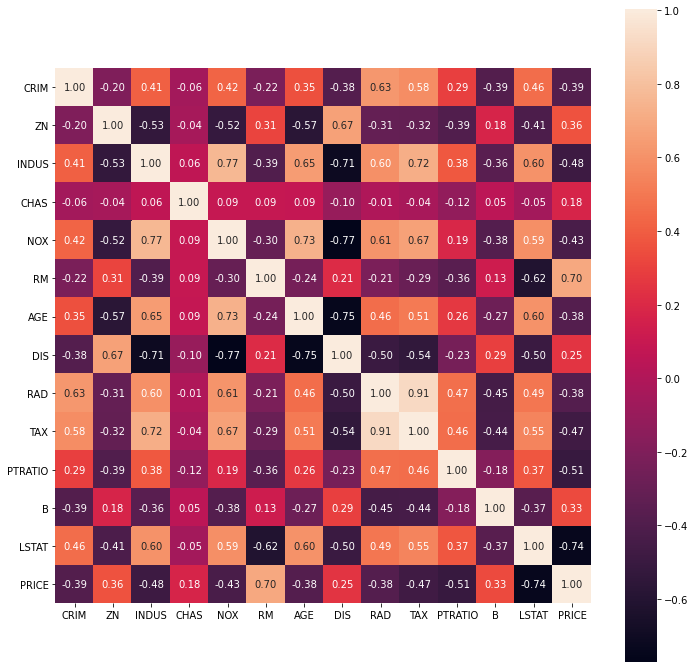

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(std_data.cov(),square=True, annot=True, fmt='.2f')
plt.show()

In [ ]:
# Heatmap için python kodunu bu hücreye yazın

# Bilgi: Ortaya çıkan grafik korelasyon grafiğine benziyor mu? :)